<a href="https://colab.research.google.com/github/kasireddyasam/AI-course-/blob/main/02_NLP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing Project

Welcome to the NLP Project for this section of the course. In this NLP project you will be attempting to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews. This will be a simpler procedure than the lecture, since we will utilize the pipeline methods for more complex tasks.

We will use the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users.

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

Let's get started! Just follow the directions below!

## Imports
 **Import the usual suspects. :) **

In [8]:
import numpy as np
import pandas as pd

## The Data

**Read the yelp.csv file and set it as a dataframe called yelp.**

In [9]:
df=pd.read_csv("yelp.csv")

** Check the head, info , and describe methods on yelp.**

In [10]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [12]:
df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


**Create a new column called "text length" which is the number of words in the text column.**

In [13]:
df["text length"]=df["text"].apply(len)
print(df["text"][0])
df.head()

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


# EDA

Let's explore the data

## Imports

**Import the data visualization libraries if you haven't done so already.**

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

**Use FacetGrid from the seaborn library to create a grid of 5 histograms of text length based off of the star ratings. Reference the seaborn documentation for hints on this**

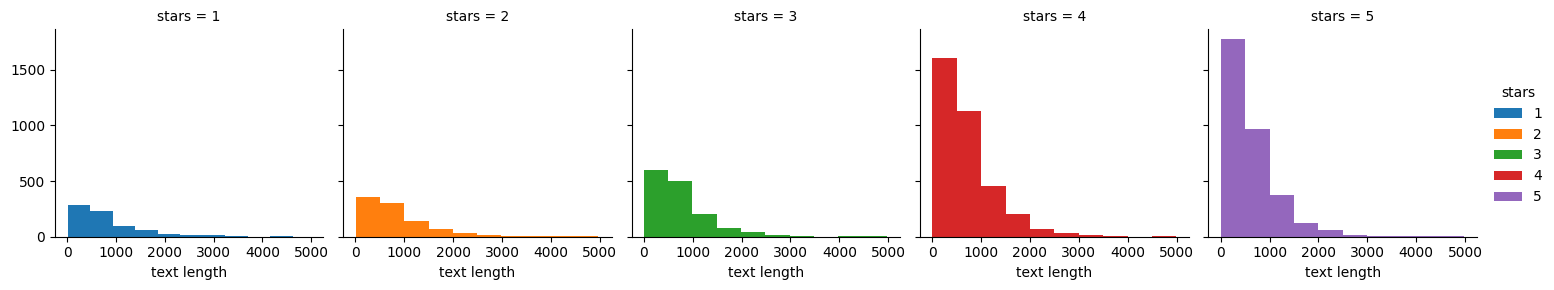

In [15]:
sns.FacetGrid(df,col="stars",hue="stars").map(plt.hist,"text length").add_legend() # implace of map we can use plot(plt.hist,"text length"))

**Create a boxplot of text length for each star category.**

<ipython-input-16-da0276003bd8>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df,x="stars",y="text length",palette="rainbow")


<Axes: xlabel='stars', ylabel='text length'>

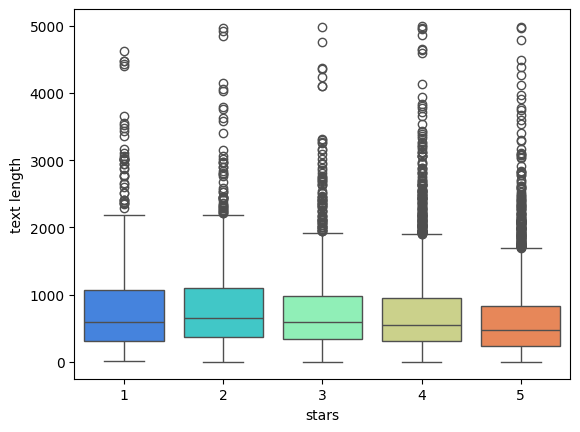

In [16]:
sns.boxplot(df,x="stars",y="text length",palette="rainbow")

**Create a countplot of the number of occurrences for each type of star rating.**

<ipython-input-17-5c6f7aeb6156>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["stars"]);


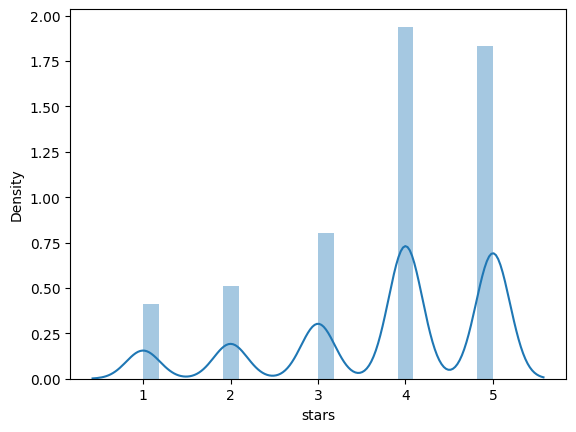

In [17]:
sns.distplot(df["stars"]);

<ipython-input-18-8647f36fc34b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df,x="stars",palette="rainbow")


<Axes: xlabel='stars', ylabel='count'>

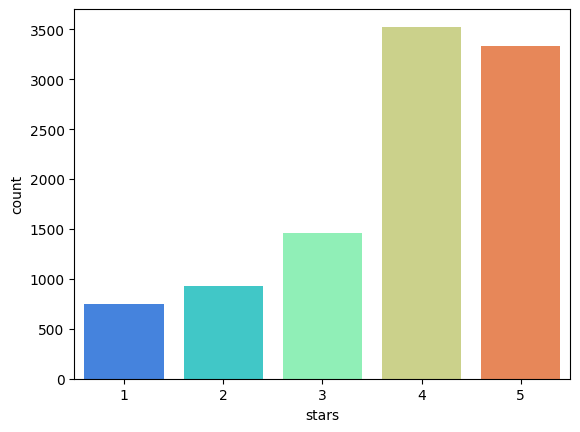

In [18]:
sns.countplot(df,x="stars",palette="rainbow")

** Use groupby to get the mean values of the numerical columns, you should be able to create this dataframe with the operation:**

In [19]:
df.columns

Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny', 'text length'],
      dtype='object')

In [20]:
df.groupby("stars")[["cool", "useful", "funny", "text length"]].mean()

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


**Use the corr() method on that groupby dataframe to produce this dataframe:**

In [21]:
df.groupby("stars")[["cool","useful","funny","text length"]].corr()

cool    useful     funny  text length
stars                                                       
1     cool         1.000000  0.759015  0.802161     0.276812
      useful       0.759015  1.000000  0.667355     0.334015
      funny        0.802161  0.667355  1.000000     0.261910
      text length  0.276812  0.334015  0.261910     1.000000
2     cool         1.000000  0.785922  0.826350     0.276901
      useful       0.785922  1.000000  0.669214     0.306575
      funny        0.826350  0.669214  1.000000     0.265515
      text length  0.276901  0.306575  0.265515     1.000000
3     cool         1.000000  0.853302  0.832051     0.260068
      useful       0.853302  1.000000  0.760241     0.300406
      funny        0.832051  0.760241  1.000000     0.256729
      text length  0.260068  0.300406  0.256729     1.000000
4     cool         1.000000  0.902031  0.851593     0.273000
      useful       0.902031  1.000000  0.794473     0.308183
      funny        0.851593  0.794473  1.000000     0.233477
      text length  0.273000  0.308183  0.233477     1.000000
5     cool         1.000000  0.926913  0.718411     0.237470
      useful       0.926913  1.000000  0.692654     0.278288
      funny        0.718411  0.692654  1.000000     0.251961
      text length  0.237470  0.278288  0.251961     1.000000

**Then use seaborn to create a heatmap based off that .corr() dataframe:**

<Axes: ylabel='stars-None'>

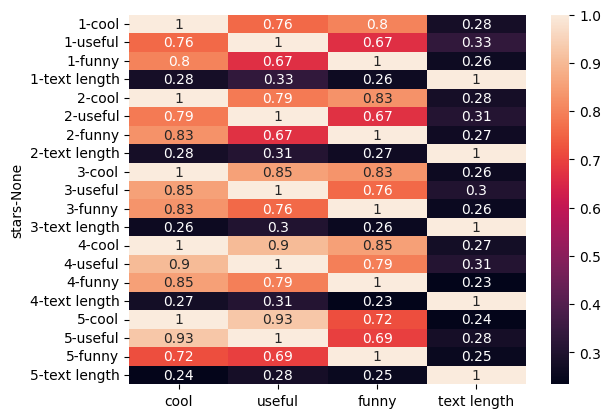

In [22]:
sns.heatmap(df.groupby("stars")[["cool","useful","funny","text length"]].corr(),annot=True)

## NLP Classification Task

Let's move on to the actual task. To make things a little easier, go ahead and only grab reviews that were either 1 star or 5 stars.

**Create a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.**

In [23]:
yelp_class=df[(df["stars"]==1)| (df["stars"]==5)] # contains both 5* and 1* ratings data;
#print(yelp_class[yelp_class["stars"]==1])
pd.DataFrame(yelp_class)
yelp_class[yelp_class["stars"]==5]


,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565
...,...,...,...,...,...,...,...,...,...,...,...
9990,R8VwdLyvsp9iybNqRvm94g,2011-10-03,pcEeHdAJPoFNF23es0kKWg,5,Yes I do rock the hipster joints. I dig this ...,review,b92Y3tyWTQQZ5FLifex62Q,1,1,1,263
9991,WJ5mq4EiWYAA4Vif0xDfdg,2011-12-05,EuHX-39FR7tyyG1ElvN1Jw,5,Only 4 stars? \n\n(A few notes: The folks that...,review,hTau-iNZFwoNsPCaiIUTEA,1,1,0,908
9992,f96lWMIAUhYIYy9gOktivQ,2009-03-10,YF17z7HWlMj6aezZc-pVEw,5,I'm not normally one to jump at reviewing a ch...,review,W_QXYA7A0IhMrvbckz7eVg,2,3,2,1326
9994,L3BSpFvxcNf3T_teitgt6A,2012-03-19,0nxb1gIGFgk3WbC5zwhKZg,5,Let's see...what is there NOT to like about Su...,review,OzOZv-Knlw3oz9K5Kh5S6A,1,2,1,1968


<ipython-input-24-5435799ff7ca>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(yelp_class,x="stars",palette="rainbow")


<Axes: xlabel='stars', ylabel='count'>

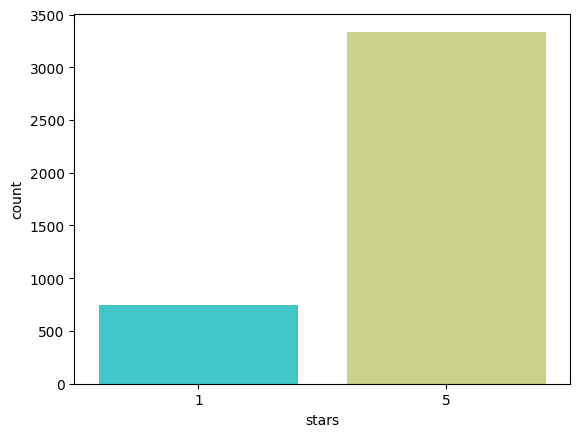

In [24]:
sns.countplot(yelp_class,x="stars",palette="rainbow")

** Create two objects X and y. X will be the 'text' column of yelp_class and y will be the 'stars' column of yelp_class. (Your features and target/labels)**

In [25]:
X=yelp_class["text"]
y=yelp_class["stars"]

**Import CountVectorizer and create a CountVectorizer object.**

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

** Use the fit_transform method on the CountVectorizer object and pass in X (the 'text' column). Save this result by overwriting X.**

In [27]:
sparse_matrix=cv.fit_transform(X)
print(cv.get_feature_names_out())
print(sparse_matrix.toarray())
sparse_matrix.shape

['00' '000' '00a' ... 'éclairs' 'école' 'ém']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(4086, 19183)

In [28]:
import string
string.punctuation
import nltk
nltk.download('stopwords')
nltk.download("punkt")
from nltk.corpus import stopwords
stop_words=stopwords.words("english")

def text_processing(text):
    nopunc=''.join([char for char in text if char not in string.punctuation])
    return [word for word in nopunc.split() if word not in stop_words]



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [29]:
yelp_class.columns
yelp_class_textProcess=yelp_class["text"].apply(text_processing)
print(yelp_class_textProcess[0])

['My', 'wife', 'took', 'birthday', 'breakfast', 'excellent', 'The', 'weather', 'perfect', 'made', 'sitting', 'outside', 'overlooking', 'grounds', 'absolute', 'pleasure', 'Our', 'waitress', 'excellent', 'food', 'arrived', 'quickly', 'semibusy', 'Saturday', 'morning', 'It', 'looked', 'like', 'place', 'fills', 'pretty', 'quickly', 'earlier', 'get', 'better', 'Do', 'favor', 'get', 'Bloody', 'Mary', 'It', 'phenomenal', 'simply', 'best', 'Ive', 'ever', 'Im', 'pretty', 'sure', 'use', 'ingredients', 'garden', 'blend', 'fresh', 'order', 'It', 'amazing', 'While', 'EVERYTHING', 'menu', 'looks', 'excellent', 'I', 'white', 'truffle', 'scrambled', 'eggs', 'vegetable', 'skillet', 'tasty', 'delicious', 'It', 'came', '2', 'pieces', 'griddled', 'bread', 'amazing', 'absolutely', 'made', 'meal', 'complete', 'It', 'best', 'toast', 'Ive', 'ever', 'Anyway', 'I', 'cant', 'wait', 'go', 'back']


In [30]:
vectorizer=CountVectorizer(analyzer=text_processing) ## vectorizer is object
yelp_countvectorizer=vectorizer.fit_transform(yelp_class["text"]) ## spares matrix=vectorizer

In [31]:
print(vectorizer.get_feature_names_out())

['0' '00s' '01042012' ... 'École' 'éclairs' 'ém']


In [32]:
print(yelp_countvectorizer.toarray(),yelp_countvectorizer.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] (4086, 26639)


## Train Test Split

Let's split our data into training and testing data.

** Use train_test_split to split up the data into X_train, X_test, y_train, y_test. Use test_size=0.3 and random_state=101 **

In [33]:
from sklearn.model_selection import train_test_split
X=yelp_countvectorizer
Y=yelp_class["stars"].values
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=101)

In [34]:
print(X_train.shape,X_test.shape)

(2860, 26639) (1226, 26639)


In [35]:
print(Y)

[5 5 5 ... 5 5 5]


## Training a Model

Time to train a model!

** Import MultinomialNB and create an instance of the estimator and call is nb **

In [36]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB() ## object creating nb=estimator function

**Now fit nb using the training data.**

In [37]:

nb.fit(X_train,y_train)

MultinomialNB()

## Predictions and Evaluations

Time to see how our model did!

**Use the predict method off of nb to predict labels from X_test.**

In [38]:
y_predicted=nb.predict(X_test) ## passing new data to model (testing data)

** Create a confusion matrix and classification report using these predictions and y_test **

In [39]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_predicted))
print(classification_report(y_test,y_predicted))

[[155  73]
 [ 22 976]]
              precision    recall  f1-score   support

           1       0.88      0.68      0.77       228
           5       0.93      0.98      0.95       998

    accuracy                           0.92      1226
   macro avg       0.90      0.83      0.86      1226
weighted avg       0.92      0.92      0.92      1226



<Axes: >

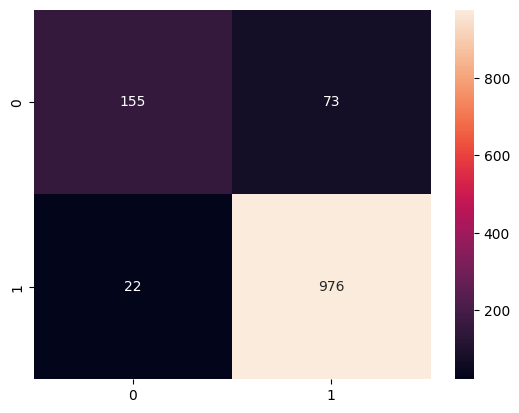

In [40]:
cm=confusion_matrix(y_test,y_predicted)
sns.heatmap(cm,annot=True,fmt="d")

<Axes: >

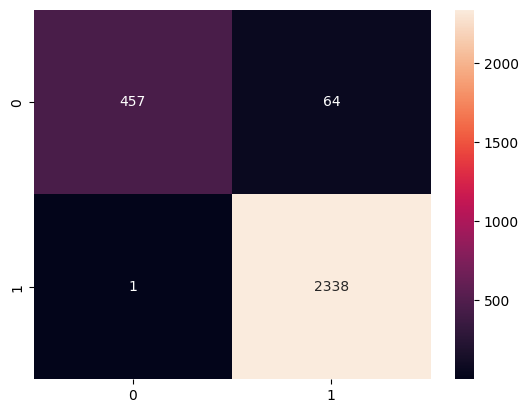

In [41]:
y_predict_train = nb.predict(X_train) ## passing data which is already tain
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True, fmt="d") ## fmt is used to convert 5.2e+02 -> number

**Great! Let's see what happens if we try to include TF-IDF to this process using a pipeline.**

# Using Text Processing

** Import TfidfTransformer from sklearn. **

In [42]:
from sklearn.feature_extraction.text import TfidfTransformer

In [43]:
yelp_tfidf=TfidfTransformer().fit_transform(yelp_countvectorizer)
print(yelp_tfidf.shape)


(4086, 26639)


In [44]:
yelp_tfidf

<4086x26639 sparse matrix of type '<class 'numpy.float64'>'
	with 239818 stored elements in Compressed Sparse Row format>

In [45]:
print(yelp_tfidf[:,:])

  (0, 26262)	0.0942204855431361
  (0, 26225)	0.09881391976758906
  (0, 26083)	0.12050786878925786
  (0, 25939)	0.09597639396417754
  (0, 25926)	0.06856180339328889
  (0, 25728)	0.12422275060759294
  (0, 25635)	0.08602136151618807
  (0, 25218)	0.13917769500182742
  (0, 24952)	0.07627367327661003
  (0, 24882)	0.10969608505491026
  (0, 24459)	0.08311395417671918
  (0, 24170)	0.07039266557539706
  (0, 23040)	0.14289257682016251
  (0, 23009)	0.0985810550692559
  (0, 22964)	0.10707544947678603
  (0, 22595)	0.17568558135443976
  (0, 22454)	0.14289257682016251
  (0, 21279)	0.19809895320596907
  (0, 20911)	0.14268659157930313
  (0, 20585)	0.11983976174380727
  (0, 20502)	0.03913019454956559
  (0, 20417)	0.10930043302469564
  (0, 20351)	0.12050786878925786
  (0, 20265)	0.07706351787969291
  (0, 19852)	0.15330087332353512
  :	:
  (4085, 14892)	0.134092535725749
  (4085, 14683)	0.08457323536396273
  (4085, 14626)	0.09992458688981794
  (4085, 13820)	0.19820884237219435
  (4085, 12417)	0.29737908402

In [46]:
X=yelp_tfidf
Y=yelp_class["stars"].values
X_tfidf_train,X_tfidf_test,y_tfidf_train,y_tfidf_test=train_test_split(X,Y,test_size=0.3,random_state=101)

In [47]:
nb.fit(X_tfidf_train,y_tfidf_train)

MultinomialNB()

[[  0 228]
 [  0 998]]


<Axes: >

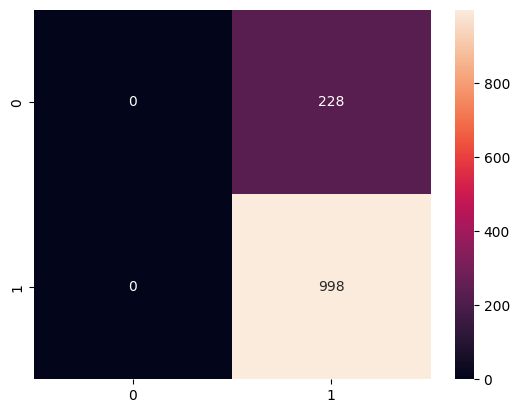

In [48]:
y_tfidf_predicted=nb.predict(X_tfidf_test)
cm=confusion_matrix(y_tfidf_test,y_tfidf_predicted)
print(cm)
sns.heatmap(cm,annot=True,fmt="d")

In [49]:
cr=classification_report(y_tfidf_test,y_tfidf_predicted)
print(cr)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[   4  517]
 [   0 2339]]


<Axes: >

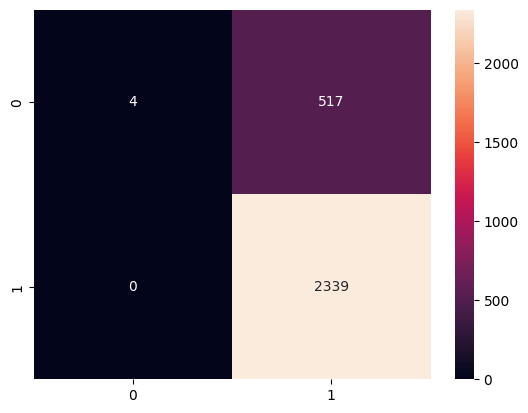

In [50]:
y_tfidf_predicted_train=nb.predict(X_tfidf_train)
cm=confusion_matrix(y_tfidf_train,y_tfidf_predicted_train)
print(cm)
sns.heatmap(cm,annot=True,fmt="d")

In [51]:
cr=classification_report(y_tfidf_train,y_tfidf_predicted_train)
print(cr)

              precision    recall  f1-score   support

           1       1.00      0.01      0.02       521
           5       0.82      1.00      0.90      2339

    accuracy                           0.82      2860
   macro avg       0.91      0.50      0.46      2860
weighted avg       0.85      0.82      0.74      2860



** Import Pipeline from sklearn. **

In [52]:
from sklearn.pipeline import Pipeline

** Now create a pipeline with the following steps:CountVectorizer(), TfidfTransformer(),MultinomialNB()**

In [53]:
pipeline=Pipeline(steps=[
    (CountVectorizer,CountVectorizer(analyzer=text_processing)),
    (TfidfTransformer,TfidfTransformer()),
    (MultinomialNB,MultinomialNB())
])

## Using the Pipeline

**Time to use the pipeline! Remember this pipeline has all your pre-process steps in it already, meaning we'll need to re-split the original data (Remember that we overwrote X as the CountVectorized version. What we need is just the text**

### Train Test Split

**Redo the train test split on the yelp_class object.**

In [54]:
from sklearn.model_selection import train_test_split
yelp_class=df[(df["stars"]==1)| (df["stars"]==5)]
X=yelp_class["text"]
Y=yelp_class["stars"]
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=101)


**Now fit the pipeline to the training data. Remember you can't use the same training data as last time because that data has already been vectorized. We need to pass in just the text and labels**

In [55]:
Pipeline.fit(X_train,y_train)

AttributeError: 'Series' object has no attribute '_check_fit_params'

### Predictions and Evaluation

** Now use the pipeline to predict from the X_test and create a classification report and confusion matrix. You should notice strange results.**

Looks like Tf-Idf actually made things worse! That is it for this project. But there is still a lot more you can play with:

**Some other things to try....**
Try going back and playing around with the pipeline steps and seeing if creating a custom analyzer like we did in the lecture helps (note: it probably won't). Or recreate the pipeline with just the CountVectorizer() and NaiveBayes. Does changing the ML model at the end to another classifier help at all?

# Great Job!